In [1]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    from math import floor, log10

    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\times 10^{{{1:d}}}$".format(coeff, exponent, precision)

In [3]:
# data
flibe_sp = openmc.StatePoint('flibe/statepoint.100.h5')
cllif_sp = openmc.StatePoint('clif/statepoint.100.h5')
flinak_sp = openmc.StatePoint('flinak/statepoint.100.h5')
pbli_sp = openmc.StatePoint('pbli/statepoint.100.h5')

sp = [flibe_sp, cllif_sp, flinak_sp, pbli_sp]

In [4]:
tbr_li6_mean = np.array([s.get_tally(name='salt_cell_tbr').mean.squeeze()[0] for s in sp])
tbr_li7_mean = np.array([s.get_tally(name='salt_cell_tbr').mean.squeeze()[1] for s in sp])
tbr_tot_mean = np.array([s.get_tally(name='salt_cell_tbr2').mean.squeeze() for s in sp])

[3.55219906e-04 4.54866664e-04 2.03969408e-04 7.97009454e-05]


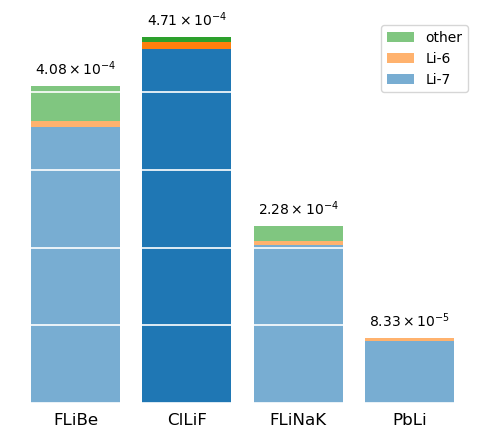

In [23]:
x = np.arange(4)
breeders = ["FLiBe", "ClLiF", "FLiNaK", "PbLi"]

print(tbr_li7_mean)

fig, ax = plt.subplots(figsize=(6, 5))
li7 = ax.bar(x, tbr_li7_mean, label="Li-7", bottom=0)
li6 = ax.bar(x, tbr_li6_mean, label="Li-6", bottom=tbr_li7_mean)
others = ax.bar(
    x,
    tbr_tot_mean - tbr_li6_mean - tbr_li7_mean,
    label="other",
    bottom=tbr_li7_mean + tbr_li6_mean,
)

ax.bar_label(others, padding=6, fontsize=10, fmt=lambda x: sci_notation(x, 2), backgroundcolor="white")

for i in [0, 2, 3]:
    li6.patches[i].set_alpha(0.6)
    li7.patches[i].set_alpha(0.6)
    others.patches[i].set_alpha(0.6)

ax.set_xticks(x)
ax.set_xticklabels(breeders, fontsize=12)
ax.spines[["right", "top", "left", "bottom"]].set_visible(False)
ax.yaxis.grid(color="white", alpha=1, lw=1.2)
ax.set_axisbelow(False)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax.tick_params(left=False, bottom=False)
ax.set_yticklabels([])
ax.legend(reverse=True)

for ext in ["pdf", "png", "svg"]:
    plt.savefig(f"tbr_chart.{ext}", bbox_inches="tight")
plt.show()